In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('C:/Users/fukai/OneDrive/Documents/insurance-database-project/data/insurance.csv')
print(df.head())
print(df.info())
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Dataset contains 1338 rows and 7 columns


In [51]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [52]:
df.fillna(df['bmi'].mean(), inplace=True)

In [53]:
df.fillna(df['region'].mode()[0], inplace=True)

In [54]:
df.dropna(inplace=True)

In [55]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 1


In [56]:
df.drop_duplicates(inplace=True)

In [57]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [58]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

In [59]:
df.rename(columns={
    'bmi': 'Body_Mass_Index',
    'children': 'Num_of_Children',
    'charges': 'Medical_Cost'
}, inplace=True)

print(df.head())

   age     sex  Body_Mass_Index  Num_of_Children smoker     region  \
0   19  female           27.900                0    yes  southwest   
1   18    male           33.770                1     no  southeast   
2   28    male           33.000                3     no  southeast   
3   33    male           22.705                0     no  northwest   
4   32    male           28.880                0     no  northwest   

   Medical_Cost  
0   16884.92400  
1    1725.55230  
2    4449.46200  
3   21984.47061  
4    3866.85520  


In [60]:
print(df.describe())

               age  Body_Mass_Index  Num_of_Children  Medical_Cost
count  1337.000000      1337.000000      1337.000000   1337.000000
mean     39.222139        30.663452         1.095737  13279.121487
std      14.044333         6.100468         1.205571  12110.359656
min      18.000000        15.960000         0.000000   1121.873900
25%      27.000000        26.290000         0.000000   4746.344000
50%      39.000000        30.400000         1.000000   9386.161300
75%      51.000000        34.700000         2.000000  16657.717450
max      64.000000        53.130000         5.000000  63770.428010


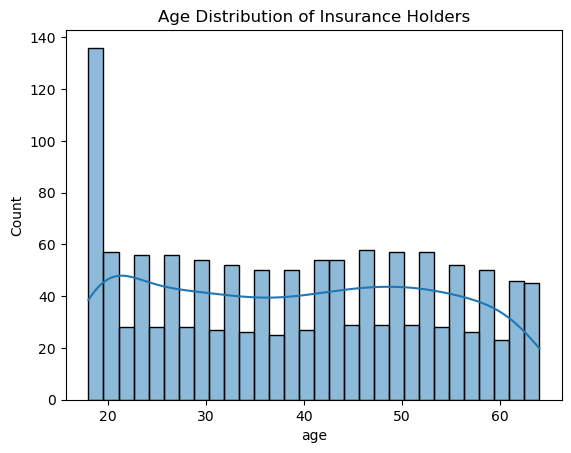

In [61]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Insurance Holders')
plt.show()

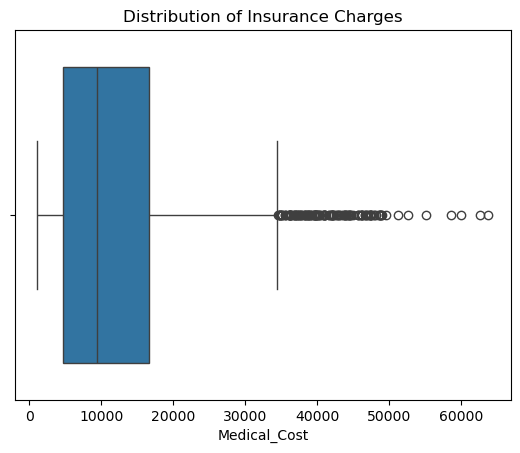

In [62]:
sns.boxplot(x=df['Medical_Cost'])
plt.title('Distribution of Insurance Charges')
plt.show()

In [63]:
print(df.dtypes)

age                   int64
sex                category
Body_Mass_Index     float64
Num_of_Children       int64
smoker             category
region             category
Medical_Cost        float64
dtype: object


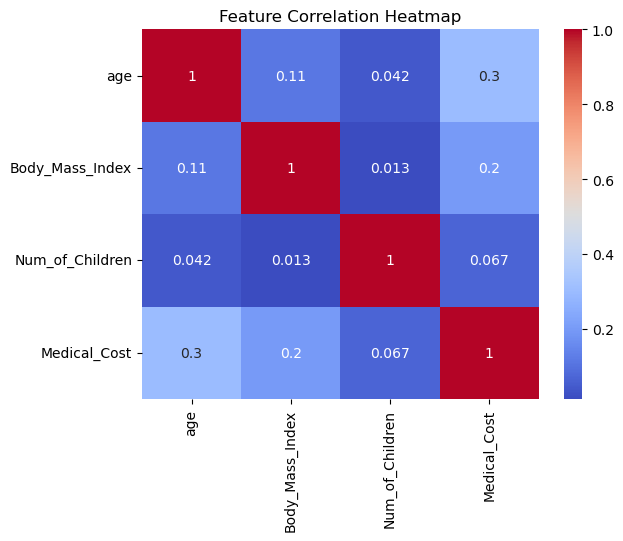

In [64]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

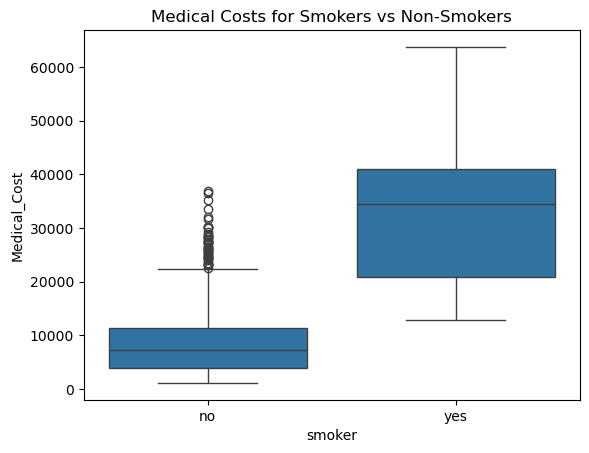

In [66]:
sns.boxplot(x='smoker', y='Medical_Cost', data=df)
plt.title('Medical Costs for Smokers vs Non-Smokers')
plt.show()

In [67]:
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 50, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
print(df[['age', 'age_group']].head(10))

   age    age_group
0   19        Young
1   18          NaN
2   28        Young
3   33  Middle-aged
4   32  Middle-aged
5   31  Middle-aged
6   46  Middle-aged
7   37  Middle-aged
8   37  Middle-aged
9   60       Senior


In [68]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print(df.head())

   age  Body_Mass_Index  Num_of_Children  Medical_Cost    age_group  sex_male  \
0   19           27.900                0   16884.92400        Young     False   
1   18           33.770                1    1725.55230          NaN      True   
2   28           33.000                3    4449.46200        Young      True   
3   33           22.705                0   21984.47061  Middle-aged      True   
4   32           28.880                0    3866.85520  Middle-aged      True   

   smoker_yes  region_northwest  region_southeast  region_southwest  
0        True             False             False              True  
1       False             False              True             False  
2       False             False              True             False  
3       False              True             False             False  
4       False              True             False             False  


In [69]:
df.to_csv('C:/Users/fukai/OneDrive/Documents/insurance-database-project/data/insurance_cleaned.csv', index=False)